# Clustering Algorithm Explorer
Test out the various algorithms in a playground.

In [ ]:
# Path to the CSV file containing the collected splats.
DATA_NAME = "collected_splats"

In [ ]:
from clustering_exploration.utils.data_handler import load_splats

splats = load_splats(DATA_NAME)

# Algorithms

Pick one using the index:

1. Sequential _k_-Means Clustering: Online k-means algorithm proposed [here](https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm)
2. k-Means: Cluster splats using K-Means clustering. This is the offline "oracle" version of the clustering.
3. Epsilon Clustering: Cluster splats that are within an epsilon distance of each other.
4. Equal-sized Bins


In [ ]:
ALGORITHM_INDEX = 1

# Common values.
CLUSTERS = 12
EPSILON = 0.11

In [ ]:
from clustering_exploration.algorithms.algorithm_base import AlgorithmBase
from clustering_exploration.algorithms.sequential_k_means import SequentialKMeansAlgorithm
from clustering_exploration.algorithms.k_means import KMeansAlgorithm
from clustering_exploration.algorithms.epsilon import EpsilonAlgorithm
from clustering_exploration.algorithms.binned import BinnedAlgorithm

# Select an algorithm.
algorithm: AlgorithmBase = [
    SequentialKMeansAlgorithm(splats, CLUSTERS),
    KMeansAlgorithm(splats, CLUSTERS),
    EpsilonAlgorithm(splats, EPSILON),
    BinnedAlgorithm(splats, CLUSTERS)
][ALGORITHM_INDEX - 1]

In [ ]:
clustered_splats = algorithm.shuffle_and_compute()

# Compute Image From Clusters
Compute the final pixel color by alpha compositing the clusters.

  0%|          | 0/1051648 [00:00<?, ?it/s]

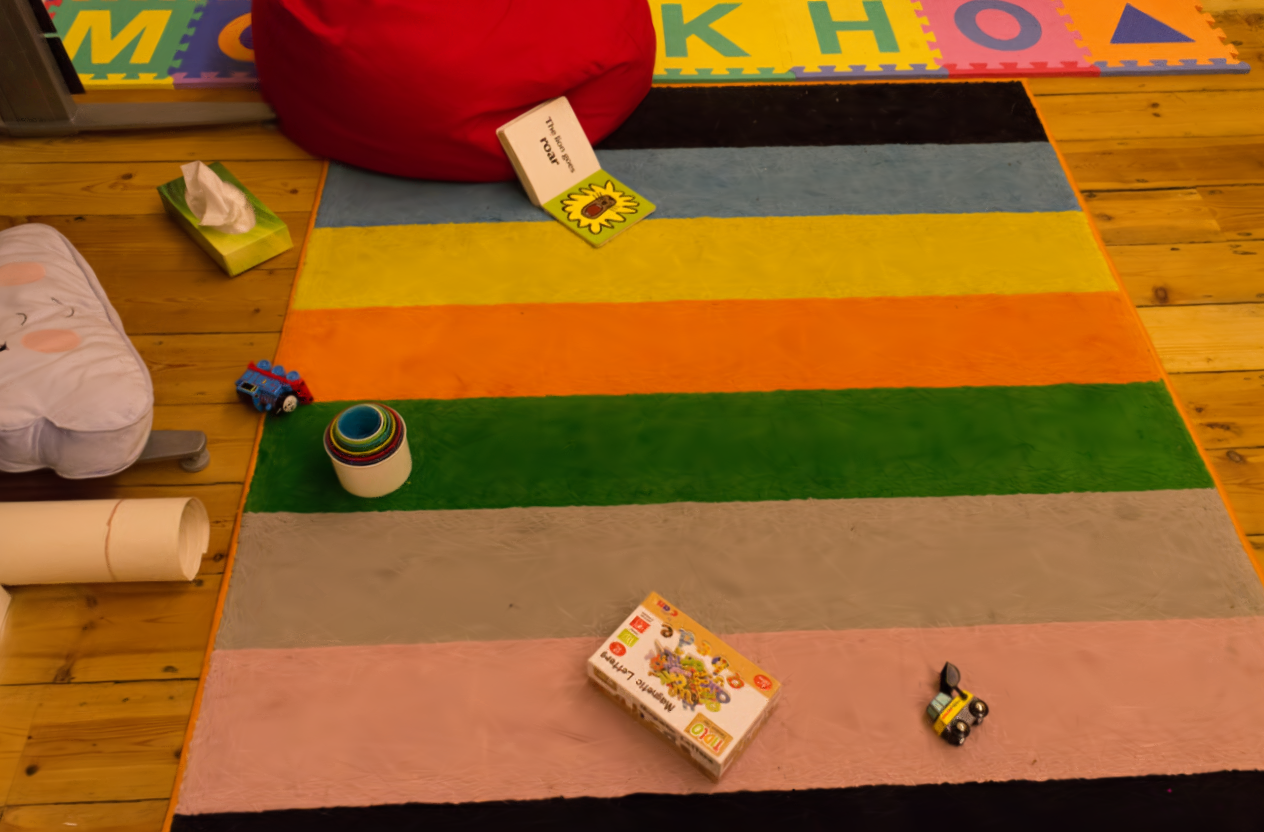

In [44]:
from clustering_exploration.utils.image_handler import compute_image_from_clusters

# Select an output name based on algorithm.
output_file_name = [
    f"sequential_k_means_clustering_k_{CLUSTERS}",
    f"k_means_clustering_k_{CLUSTERS}",
    f"epsilon_clustering_{EPSILON}",
    "binned_clustering",
][ALGORITHM_INDEX - 1]

display(compute_image_from_clusters(clustered_splats, output_file_name))